Feature extraction with Principal Component Analysis and Factor Analysis
* http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
* http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import os, sys
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import scale
from scipy.stats import pearsonr

In [2]:
datasource = "datasets/titanic.csv"
print(os.path.exists(datasource))

True


In [3]:
df = pd.read_csv(datasource).sample(frac = 1).reset_index(drop = True)

In [4]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,0,9.0,4,2,31.2750,1,0
1,3,0,14.0,0,0,7.8542,1,0
2,3,0,26.0,0,0,7.8542,1,1
3,1,0,18.0,1,0,52.0000,1,1
4,3,1,9.0,5,2,46.9000,1,0


In [5]:
X = np.array(df.iloc[:, :-1])

In [6]:
y = np.array(df["survived"])

In [7]:
print(X.shape)

(890, 7)


In [8]:
print(y.shape)

(890,)


In [9]:
pca = PCA(n_components = 5)

In [10]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
fa = FactorAnalysis(n_components = 5)

In [12]:
fa.fit(X)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=5,
        noise_variance_init=None, random_state=0, svd_method='randomized',
        tol=0.01)

## Variance ratio for PCA and FA

In [17]:
print("PCA:\n", pca.explained_variance_ratio_)

PCA:
 [  9.40387759e-01   5.87406060e-02   4.21984854e-04   1.56438754e-04
   1.46031870e-04]


In [18]:
def FA_explained_variance_ratio(fa):
    fa.explained_variance_ = np.flip(np.sort(np.sum(fa.components_**2, axis = 1)), axis = 0)
    total_variance = np.sum(fa.explained_variance_) + np.sum(fa.noise_variance_)
    fa.explained_variance_ratio_ = fa.explained_variance_ / total_variance

FA_explained_variance_ratio(fa)
    
print("FA:\n", fa.explained_variance_ratio_)

FA:
 [  9.40048739e-01   5.84015698e-02   1.99209172e-04   5.59455086e-05
   2.96715012e-05]


## Correlation coefficient for extract features

In [19]:
X_PCA = pca.transform(X)

In [24]:
corr = np.array([pearsonr(X_PCA[:,i], y)[0] for i in range(X_PCA.shape[1])])
print("PCA Correlation Coefficient:\n", corr)

PCA Correlation Coefficient:
 [ 0.24872662 -0.10055176 -0.09440155 -0.12274122  0.25317711]


In [22]:
X_FA = fa.transform(X)

In [25]:
fa_corr = [pearsonr(X_FA[:,i], y)[0] for i in range(X_FA.shape[1])]
print("FA Correlation Coefficient:\n", fa_corr)

FA Correlation Coefficient:
 [0.2488309025794517, -0.10041907651986931, -0.01104619097688643, -0.24840054259671016, -0.46894764240495879]


## Scree plots

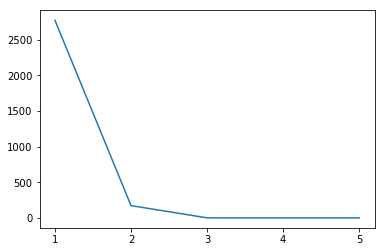

In [26]:
x_ticks = np.arange(len(pca.components_)) + 1
plt.xticks(x_ticks) 
plt.plot(x_ticks, pca.explained_variance_)

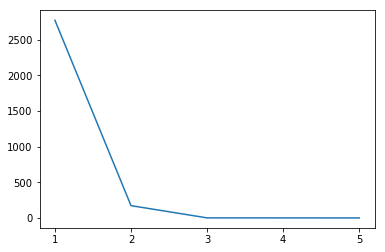

In [27]:
x_ticks = np.arange(len(fa.components_)) + 1
plt.xticks(x_ticks)

explained_variance = np.flip(np.sort(np.sum(fa.components_**2, axis = 1)), axis = 0)
plt.plot(x_ticks, explained_variance)

Plotting both in log scale

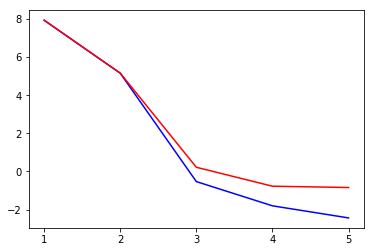

In [31]:
x_ticks = np.arange(len(pca.components_)) + 1
plt.xticks(x_ticks)
plt.plot(x_ticks, np.log(explained_variance), c = "b") # FA
plt.plot(x_ticks, np.log(pca.explained_variance_), c = "r") # PCA
plt.show()